In [1]:
import tensorflow as tf
import numpy as np
from keras.datasets import mnist
from matplotlib import pyplot as plt
from IPython.display import Image, HTML
%matplotlib inline

Using TensorFlow backend.


# CNN

The core idea of CNNs is parameter reduction through `convolution` and `pooling`:

In [2]:
HTML('<img src="convolution_schematic.gif">')

Can imagine it as producing a "feature map" over images:

In [3]:
HTML('<img src="feature_map.gif">')

Whereas `pooling` is concerned with producing a "digest" from this feature map:

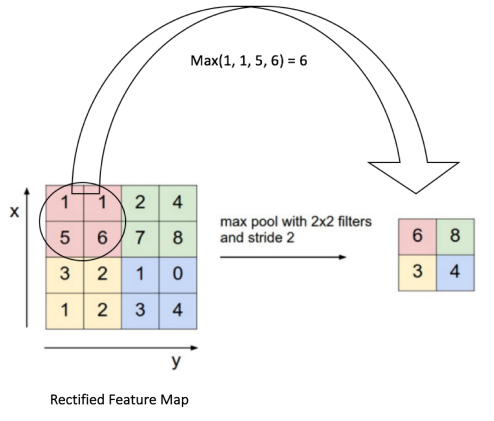

In [4]:
Image('pooling.png')

Once again, it is easy to visualize for images:

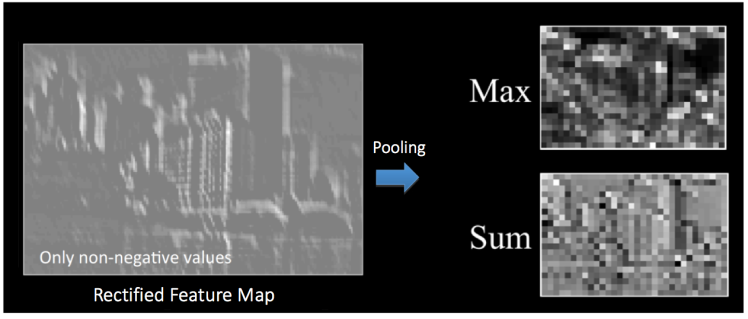

In [5]:
Image('pooling_example.png')

A convolutional neural network stacks these convolution and pooling layers on top of another as follows:

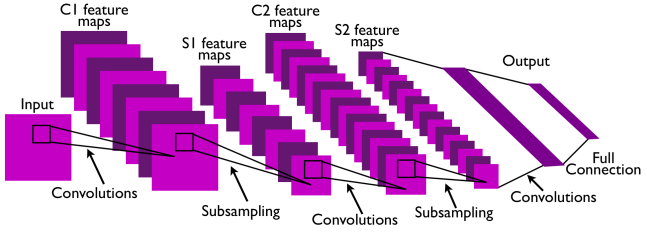

In [6]:
Image('convnet.png')

# Tensorflow Implementation

In [7]:
# Load back the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
print 'Train:', x_train.shape, y_train.shape
print 'Test: ', x_test.shape, y_test.shape

Train: (60000, 28, 28) (60000,)
Test:  (10000, 28, 28) (10000,)


In [9]:
x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255

Build the network

In [10]:
# Create placeholder for the input
x = tf.placeholder(tf.float32, shape=(None, 28, 28), name='input')

In [11]:
# Resize the input
x_ = tf.reshape(x, (-1, 28, 28, 1))

In [12]:
# Create variables to store W, b
conv1 = tf.keras.layers.Conv2D(filters=20, kernel_size=(4, 4), activation='relu')(x_)
pool1 = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(conv1)

conv2 = tf.keras.layers.Conv2D(filters=20, kernel_size=(3, 3), activation='relu')(pool1)
pool2 = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(conv2)

In [13]:
# Let's take a look at the shapes
print conv1.shape
print pool1.shape
print conv2.shape
print pool2.shape

(?, 25, 25, 20)
(?, 12, 12, 20)
(?, 10, 10, 20)
(?, 5, 5, 20)


In [14]:
# Flatten out the result
result = tf.keras.layers.Flatten()(pool2)
print result.shape

(?, 500)


In [15]:
# Add a dense layer to compute the output
output = tf.keras.layers.Dense(10, activation='softmax')(result)

Targets and loss, optimization, etc.

In [16]:
target = tf.placeholder(tf.float32, shape=(None, 10), name='target')
loss = tf.reduce_mean(tf.square(target - output))

In [17]:
optimizer = tf.train.AdamOptimizer()
train_op = optimizer.minimize(loss)

Create a session

In [18]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

It's **training** time!

In [19]:
# For Adam's variables
sess.run(tf.global_variables_initializer())

for epoch in range(10):
    loss_history = []
    
    for i in range(600):
        this_target = np.zeros((100, 10), dtype=np.float32)

        for j in range(100):
            this_target[j,y_train[i*100 + j]] = 1.0

        _, l = sess.run((train_op, loss), {x: x_train[i*100:(i+1)*100],
                                           target: this_target})

        loss_history.append(l)
    
    print 'Epoch:', epoch+1, 'Loss:', np.mean(loss_history)

Epoch: 1 Loss: 0.0156258
Epoch: 2 Loss: 0.00496598
Epoch: 3 Loss: 0.00369576
Epoch: 4 Loss: 0.00302861
Epoch: 5 Loss: 0.00263386
Epoch: 6 Loss: 0.00238236
Epoch: 7 Loss: 0.00214942
Epoch: 8 Loss: 0.00195408
Epoch: 9 Loss: 0.00182083
Epoch: 10 Loss: 0.00165692


Testing

In [20]:
accuracy = []

for i in range(100):
    pred = sess.run(tf.argmax(output, axis=1), {x: x_test[i*100:(i+1)*100]})
    accuracy.append(np.mean(np.equal(pred, y_test[i*100:(i+1)*100])))

In [21]:
print 'Accuracy:', np.mean(accuracy)

Accuracy: 0.9862
